In [7]:
pip install tensorflow

     -------------------------------------- 266.3/266.3 MB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 1.5 MB/s eta 0:00:00
     -------------------------------------- 124.6/124.6 kB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 1.5 MB/s eta 0:00:00
     ------------------------------------ 177.0/177.0 kB 821.7 kB/s eta 0:00:00
     ------------------------------------ 781.3/781.3 kB 567.4 kB/s eta 0:00:00
     ------------------------------------ 151.

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.model_selection import cross_validate
from imblearn.under_sampling import RandomUnderSampler
import math

In [32]:
df = pd.read_csv("C:/Users/ASUS/Downloads/loan_data_2007_2014.csv")
df = df.loc[:,'member_id':]
df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25056\4199429398.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/ASUS/Downloads/loan_data_2007_2014.csv")


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [33]:
df['loan_status'] = df['loan_status'].map({'Fully Paid' :1, 'Charged Off' :0, 'Current' :1, 'Default' :0, 'Late (31-120 days)' :0, 'In Grace Period' :1, 'Late (16-30 days)' :0, 'Does not meet the credit policy. Status:Fully Paid' :1, 'Does not meet the credit policy. Status:Charged Off' :0}).astype(int)
df['loan_status'].dtypes

dtype('int32')

# **Data Understanding**

In [34]:
credit_risk_df = df[['member_id','loan_amnt','funded_amnt','term','int_rate','installment','emp_length','annual_inc','verification_status','loan_status']]
credit_risk_df

,member_id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,verification_status,loan_status
0,1296599,5000,5000,36 months,10.65,162.87,10+ years,24000.0,Verified,1
1,1314167,2500,2500,60 months,15.27,59.83,< 1 year,30000.0,Source Verified,0
2,1313524,2400,2400,36 months,15.96,84.33,10+ years,12252.0,Not Verified,1
3,1277178,10000,10000,36 months,13.49,339.31,10+ years,49200.0,Source Verified,1
4,1311748,3000,3000,60 months,12.69,67.79,1 year,80000.0,Source Verified,1
...,...,...,...,...,...,...,...,...,...,...
466280,1440975,18400,18400,60 months,14.47,432.64,4 years,110000.0,Source Verified,1
466281,11536848,22000,22000,60 months,19.97,582.50,10+ years,78000.0,Verified,0
466282,11436914,20700,20700,60 months,16.99,514.34,7 years,46000.0,Verified,1
466283,11457002,2000,2000,36 months,7.90,62.59,3 years,83000.0,Verified,1


In [35]:
credit_risk_df.shape

(466285, 10)

In [36]:
credit_risk_df.dtypes

member_id                int64
loan_amnt                int64
funded_amnt              int64
term                    object
int_rate               float64
installment            float64
emp_length              object
annual_inc             float64
verification_status     object
loan_status              int32
dtype: object

# **Data Cleaning**

In [37]:
#Change term format from (n months) to (n) and change it to integer
credit_risk_df['term'] = list(map(lambda x: x.replace(" months",""),credit_risk_df['term']))
credit_risk_df['term'] = list(map(int,credit_risk_df['term']))
credit_risk_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25056\203768335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_risk_df['term'] = list(map(lambda x: x.replace(" months",""),credit_risk_df['term']))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25056\203768335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_risk_df['term'] = list(map(int,credit_risk_df['term']))


,member_id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,verification_status,loan_status
0,1296599,5000,5000,36,10.65,162.87,10+ years,24000.0,Verified,1
1,1314167,2500,2500,60,15.27,59.83,< 1 year,30000.0,Source Verified,0
2,1313524,2400,2400,36,15.96,84.33,10+ years,12252.0,Not Verified,1
3,1277178,10000,10000,36,13.49,339.31,10+ years,49200.0,Source Verified,1
4,1311748,3000,3000,60,12.69,67.79,1 year,80000.0,Source Verified,1
...,...,...,...,...,...,...,...,...,...,...
466280,1440975,18400,18400,60,14.47,432.64,4 years,110000.0,Source Verified,1
466281,11536848,22000,22000,60,19.97,582.50,10+ years,78000.0,Verified,0
466282,11436914,20700,20700,60,16.99,514.34,7 years,46000.0,Verified,1
466283,11457002,2000,2000,36,7.90,62.59,3 years,83000.0,Verified,1


In [38]:
#Change emp_length from (n(+) years/year) to (n) and turn it to integer
credit_risk_df['emp_length'] = list(map(lambda x: str(x).replace(" years","").replace(" year",""),credit_risk_df['emp_length']))
credit_risk_df.loc[credit_risk_df['emp_length'] == "10+", ['emp_length']] = '11' #More than 10 set to 11
credit_risk_df.loc[credit_risk_df['emp_length'] == "< 1", ['emp_length']] = '0' #Less than 1 set to 0
credit_risk_df['emp_length'] = list(map(float,credit_risk_df['emp_length']))
credit_risk_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25056\575590182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_risk_df['emp_length'] = list(map(lambda x: str(x).replace(" years","").replace(" year",""),credit_risk_df['emp_length']))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25056\575590182.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_risk_df['emp_length'] = list(map(float,credit_risk_df['emp_length']))


,member_id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,verification_status,loan_status
0,1296599,5000,5000,36,10.65,162.87,11.0,24000.0,Verified,1
1,1314167,2500,2500,60,15.27,59.83,0.0,30000.0,Source Verified,0
2,1313524,2400,2400,36,15.96,84.33,11.0,12252.0,Not Verified,1
3,1277178,10000,10000,36,13.49,339.31,11.0,49200.0,Source Verified,1
4,1311748,3000,3000,60,12.69,67.79,1.0,80000.0,Source Verified,1
...,...,...,...,...,...,...,...,...,...,...
466280,1440975,18400,18400,60,14.47,432.64,4.0,110000.0,Source Verified,1
466281,11536848,22000,22000,60,19.97,582.50,11.0,78000.0,Verified,0
466282,11436914,20700,20700,60,16.99,514.34,7.0,46000.0,Verified,1
466283,11457002,2000,2000,36,7.90,62.59,3.0,83000.0,Verified,1


In [39]:
#Change verification format from string to
# 0 = Not Verified
# 1 = Source Verified
# 2 = Verified
credit_risk_df['verification_status'] = credit_risk_df['verification_status'].map({'Not Verified' :0, 'Source Verified' :1, 'Verified' :2}).astype(int)
credit_risk_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25056\172975932.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_risk_df['verification_status'] = credit_risk_df['verification_status'].map({'Not Verified' :0, 'Source Verified' :1, 'Verified' :2}).astype(int)


,member_id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,verification_status,loan_status
0,1296599,5000,5000,36,10.65,162.87,11.0,24000.0,2,1
1,1314167,2500,2500,60,15.27,59.83,0.0,30000.0,1,0
2,1313524,2400,2400,36,15.96,84.33,11.0,12252.0,0,1
3,1277178,10000,10000,36,13.49,339.31,11.0,49200.0,1,1
4,1311748,3000,3000,60,12.69,67.79,1.0,80000.0,1,1
...,...,...,...,...,...,...,...,...,...,...
466280,1440975,18400,18400,60,14.47,432.64,4.0,110000.0,1,1
466281,11536848,22000,22000,60,19.97,582.50,11.0,78000.0,2,0
466282,11436914,20700,20700,60,16.99,514.34,7.0,46000.0,2,1
466283,11457002,2000,2000,36,7.90,62.59,3.0,83000.0,2,1


In [41]:
credit_risk_df = credit_risk_df.dropna()

# **Data Visualization**

In [42]:
corr = credit_risk_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,member_id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,verification_status,loan_status
member_id,1.000000,0.073679,0.077495,0.082726,-0.030632,0.045108,0.040648,0.028326,-0.068431,0.092322
loan_amnt,0.073679,1.000000,0.998508,0.410491,0.171947,0.949011,0.122122,0.363525,0.392459,-0.016208
funded_amnt,0.077495,0.998508,1.000000,0.408457,0.172691,0.951182,0.122663,0.362938,0.391618,-0.015400
term,0.082726,0.410491,0.408457,1.000000,0.448622,0.155338,0.081992,0.063750,0.281231,-0.067445
int_rate,-0.030632,0.171947,0.172691,0.448622,1.000000,0.152353,0.030246,-0.045635,0.241633,-0.176662
installment,0.045108,0.949011,0.951182,0.155338,0.152353,1.000000,0.106278,0.361600,0.357552,-0.017954
emp_length,0.040648,0.122122,0.122663,0.081992,0.030246,0.106278,1.000000,0.075572,0.082184,0.017456
annual_inc,0.028326,0.363525,0.362938,0.063750,-0.045635,0.361600,0.075572,1.000000,0.131697,0.048257
verification_status,-0.068431,0.392459,0.391618,0.281231,0.241633,0.357552,0.082184,0.131697,1.000000,-0.045299
loan_status,0.092322,-0.016208,-0.015400,-0.067445,-0.176662,-0.017954,0.017456,0.048257,-0.045299,1.000000


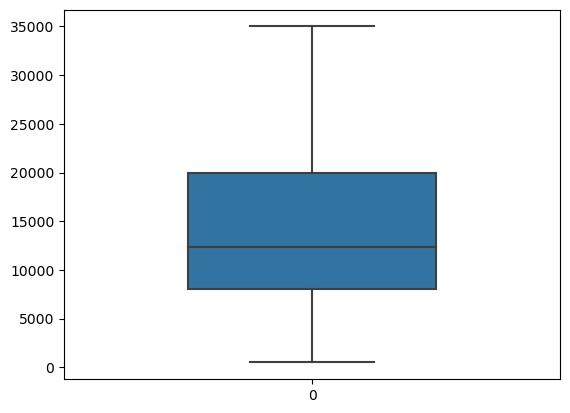

In [43]:
loan_amnt = sns.boxplot(data=credit_risk_df['loan_amnt'], width=0.5)

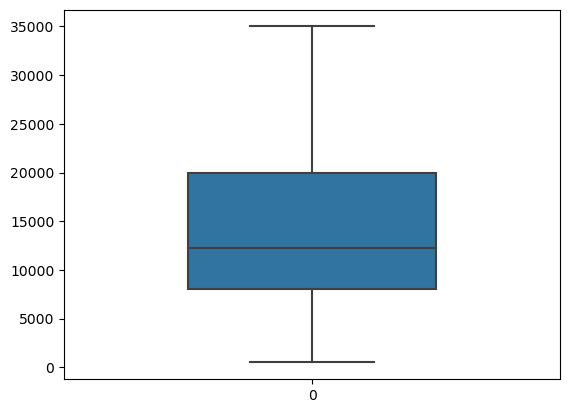

In [44]:
funded_amnt	 = sns.boxplot(data=credit_risk_df['funded_amnt'], width=0.5)

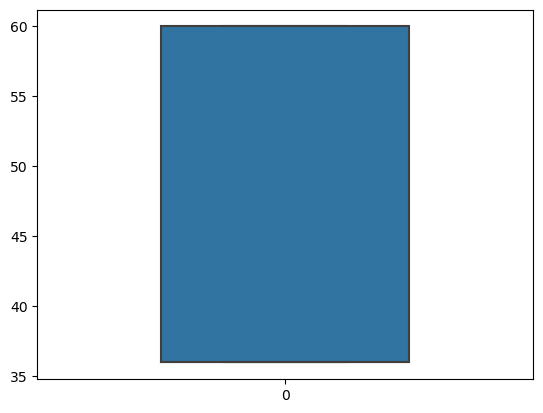

In [45]:
term = sns.boxplot(data=credit_risk_df['term'], width=0.5)

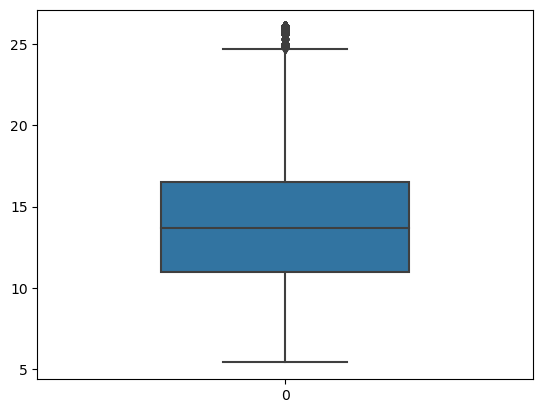

In [46]:
int_rate = sns.boxplot(data=credit_risk_df['int_rate'], width=0.5)

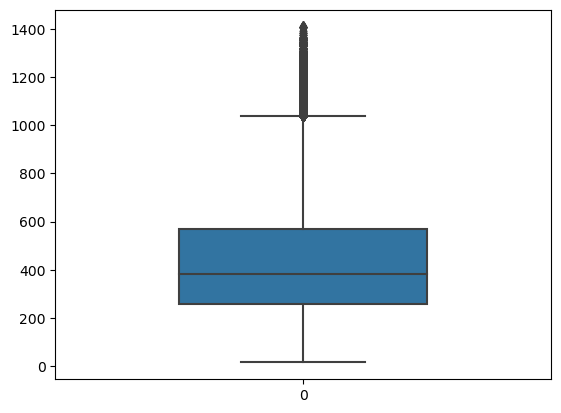

In [47]:
installment = sns.boxplot(data=credit_risk_df['installment'], width=0.5)

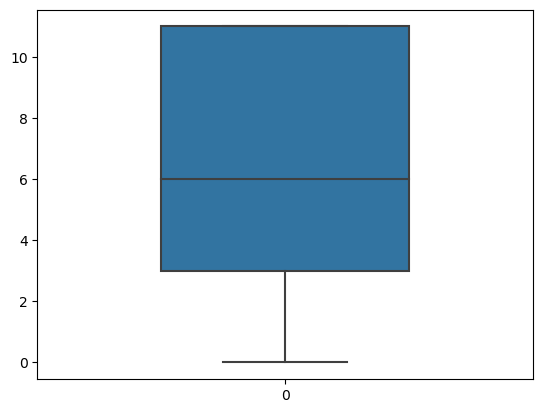

In [48]:
emp_length = sns.boxplot(data=credit_risk_df['emp_length'], width=0.5)

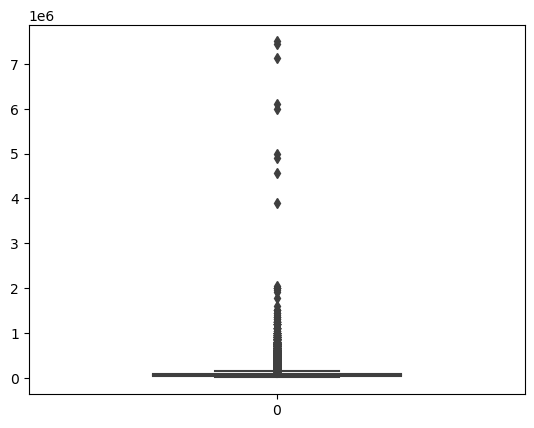

In [49]:
annual_inc = sns.boxplot(data=credit_risk_df['annual_inc'], width=0.5)

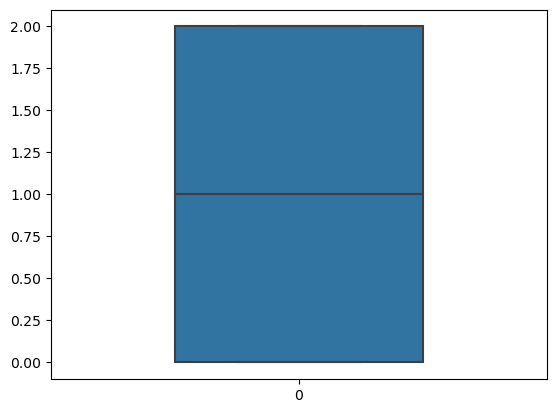

In [50]:
verification_status = sns.boxplot(data=credit_risk_df['verification_status'], width=0.5)

<AxesSubplot:xlabel='loan_status', ylabel='count'>

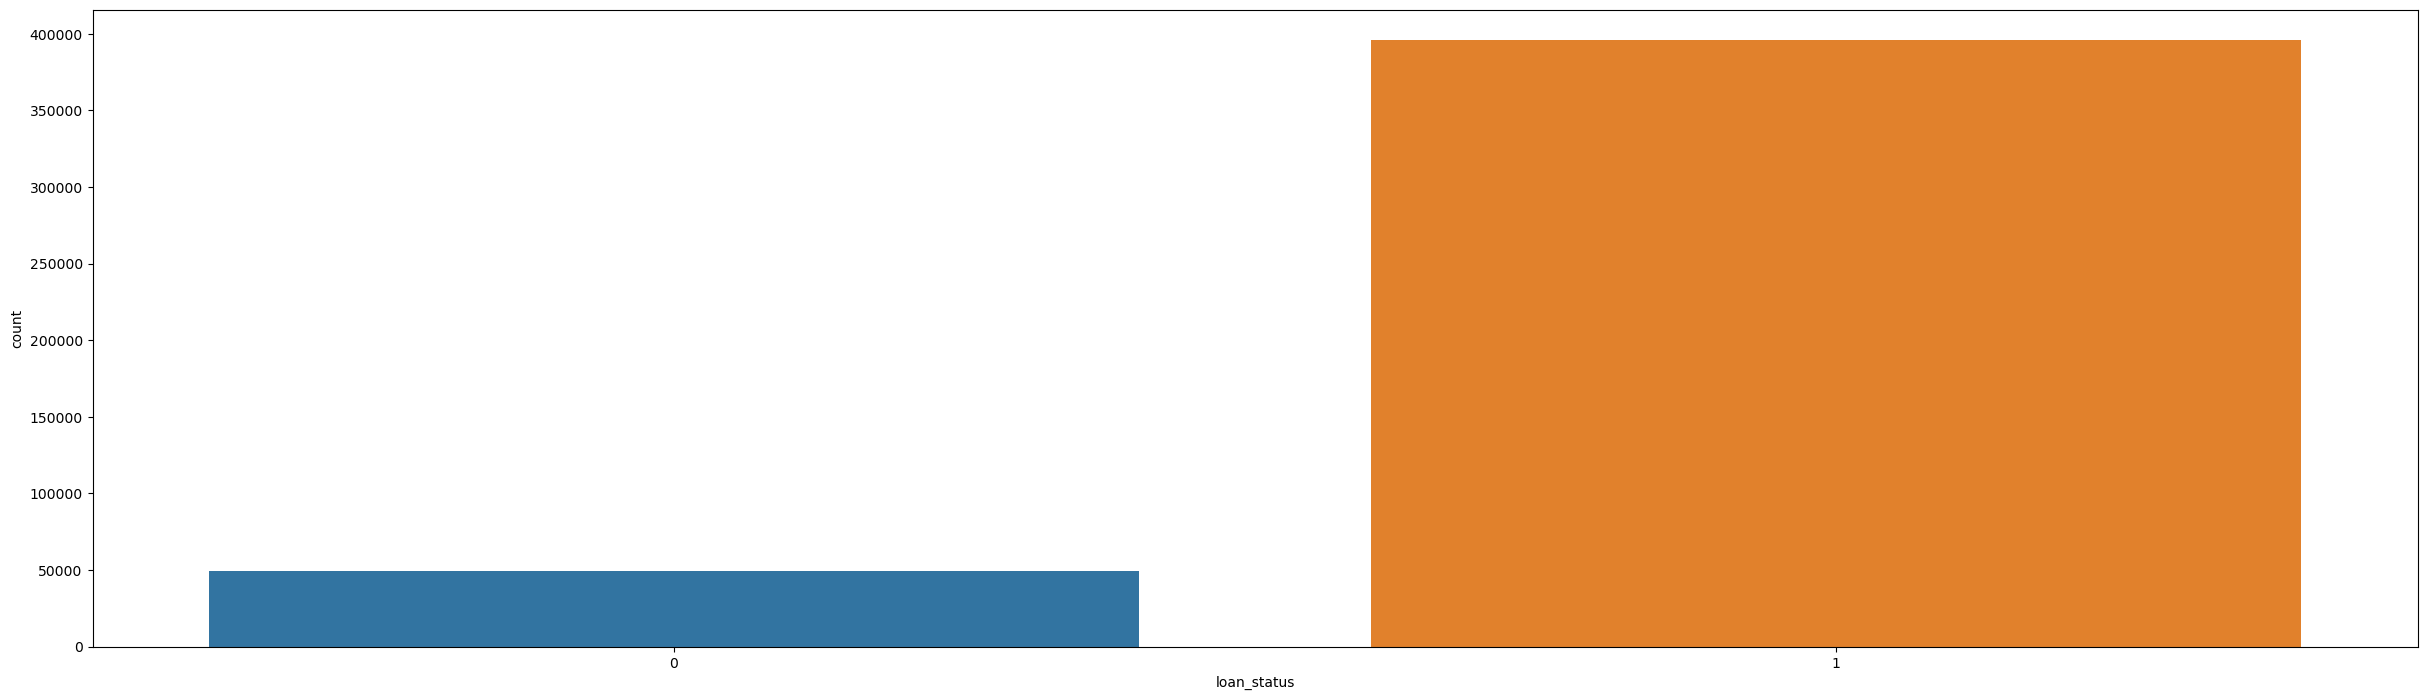

In [51]:
fig, ax = plt.subplots(figsize=(30, 8.27))
sns.countplot(ax=ax, data=credit_risk_df, x='loan_status')

# **Preprocessing**

In [89]:
X_data = credit_risk_df.loc[:,:'verification_status'] 
X_data 

,member_id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,verification_status
0,1296599,5000,5000,36,10.65,162.87,11.0,24000.0,2
1,1314167,2500,2500,60,15.27,59.83,0.0,30000.0,1
2,1313524,2400,2400,36,15.96,84.33,11.0,12252.0,0
3,1277178,10000,10000,36,13.49,339.31,11.0,49200.0,1
4,1311748,3000,3000,60,12.69,67.79,1.0,80000.0,1
...,...,...,...,...,...,...,...,...,...
466280,1440975,18400,18400,60,14.47,432.64,4.0,110000.0,1
466281,11536848,22000,22000,60,19.97,582.50,11.0,78000.0,2
466282,11436914,20700,20700,60,16.99,514.34,7.0,46000.0,2
466283,11457002,2000,2000,36,7.90,62.59,3.0,83000.0,2


In [90]:
Y = credit_risk_df['loan_status'] 
Y.shape

(445273,)

In [91]:
undersampling = RandomUnderSampler(sampling_strategy='all')
X_over, Y_over = undersampling.fit_resample(X_data,Y)
print(X_over.shape,' ',Y_over.shape)

(98662, 9)   (98662,)


<AxesSubplot:xlabel='loan_status', ylabel='count'>

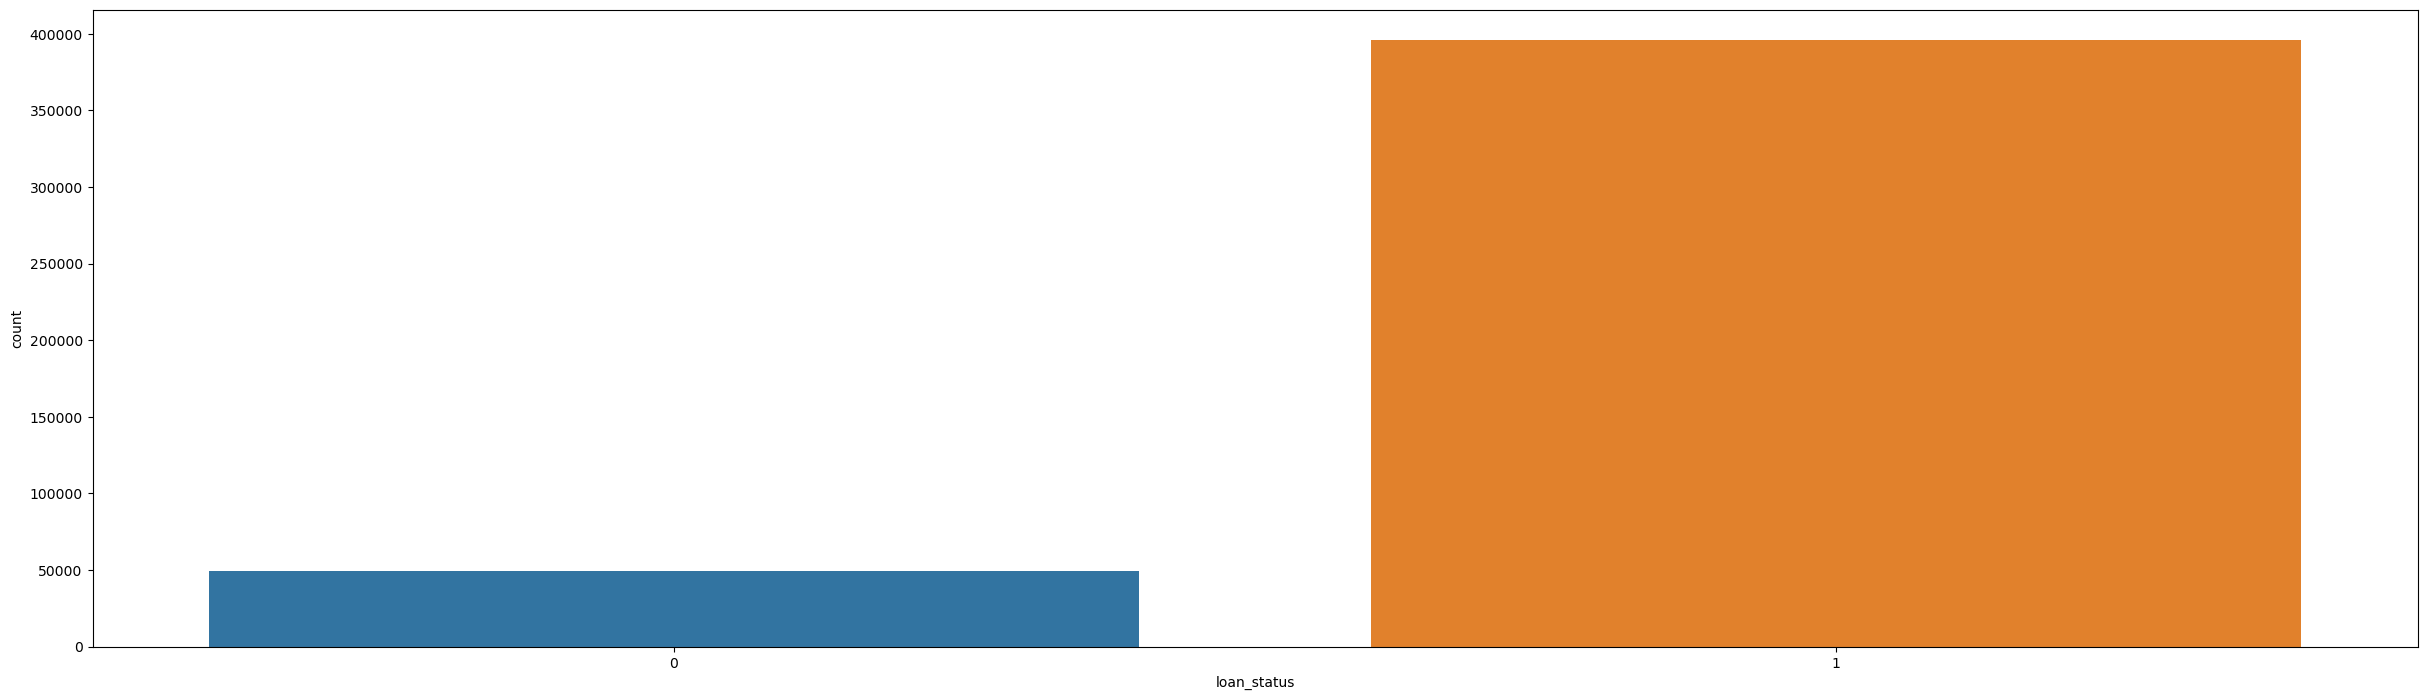

In [92]:
fig, ax = plt.subplots(figsize=(30, 8.27))
sns.countplot(ax=ax, data=credit_risk_df, x='loan_status')

<AxesSubplot:xlabel='loan_status', ylabel='count'>

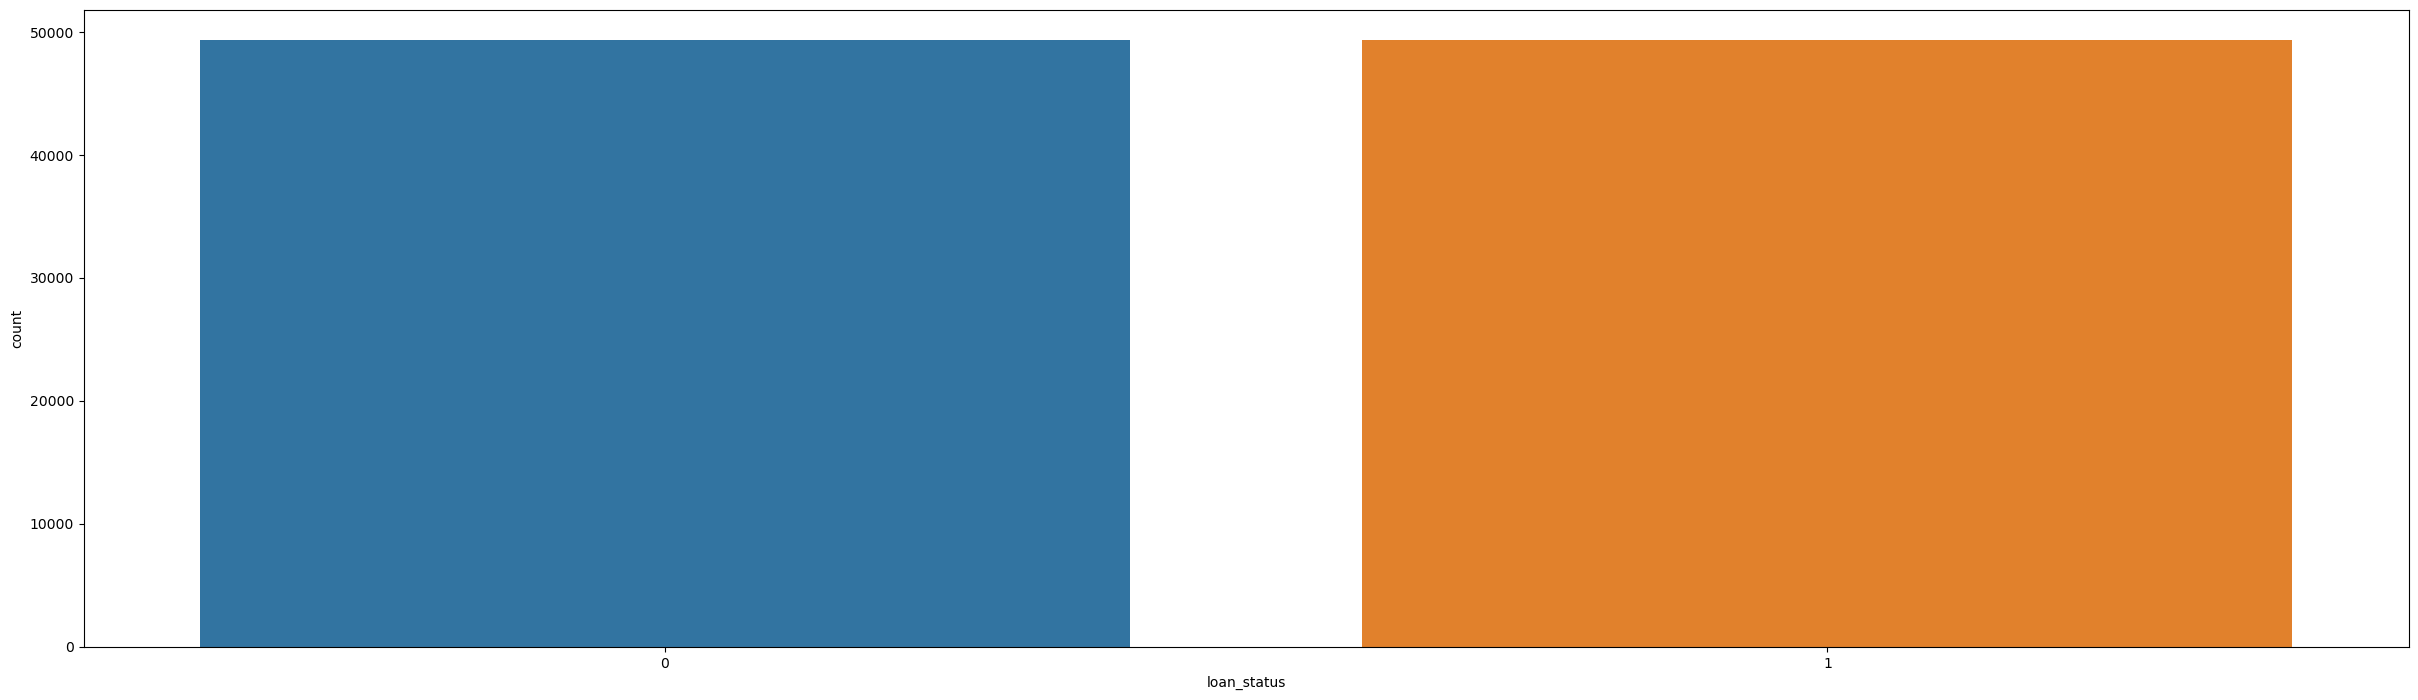

In [93]:
X_over['loan_status'] = Y_over
fig, ax = plt.subplots(figsize=(30, 8.27))
sns.countplot(ax=ax, data=X_over, x='loan_status')

In [94]:
X_over = X_over.drop(columns=['loan_status'])
X_over

,member_id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,verification_status
0,17101619,7200,7200,36,12.99,242.57,2.0,45000.0,1
1,5308152,35000,35000,60,19.05,908.89,3.0,97000.0,1
2,588339,6500,6500,36,14.96,225.20,1.0,60000.0,0
3,4639447,5000,5000,36,15.80,175.30,2.0,78565.0,1
4,9887073,8300,8300,36,16.20,292.63,1.0,45000.0,0
...,...,...,...,...,...,...,...,...,...
98657,26426545,12250,12250,60,24.50,355.98,5.0,53475.0,0
98658,5667160,18000,18000,36,12.12,598.89,11.0,45000.0,0
98659,11507870,20000,20000,36,13.53,679.00,5.0,75000.0,2
98660,912181,4000,4000,36,10.00,129.07,1.0,38196.0,1


In [95]:
#Define Scaler

scaler = MinMaxScaler()

In [96]:
X = scaler.fit_transform(X_over)
X =  pd.DataFrame(X,columns=['member_id','loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'verification_status'])
X

,member_id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,verification_status
0,0.417526,0.194203,0.194203,0.0,0.366764,0.162949,0.181818,0.006023,0.5
1,0.128400,1.000000,1.000000,1.0,0.660368,0.641469,0.272727,0.013306,0.5
2,0.012690,0.173913,0.173913,0.0,0.462209,0.150475,0.090909,0.008124,0.0
3,0.112006,0.130435,0.130435,0.0,0.502907,0.114639,0.181818,0.010724,0.5
4,0.240656,0.226087,0.226087,0.0,0.522287,0.198900,0.090909,0.006023,0.0
...,...,...,...,...,...,...,...,...,...
98657,0.646133,0.340580,0.340580,1.0,0.924419,0.244395,0.454545,0.007210,0.0
98658,0.137201,0.507246,0.507246,0.0,0.324612,0.418841,1.000000,0.006023,0.0
98659,0.280391,0.565217,0.565217,0.0,0.392926,0.476373,0.454545,0.010224,1.0
98660,0.020630,0.101449,0.101449,0.0,0.221899,0.081439,0.090909,0.005070,0.5


In [111]:
X.describe()

,member_id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,verification_status
count,98662.000000,98662.000000,98662.000000,98662.000000,98662.000000,98662.000000,98662.000000,98662.000000,98662.000000
mean,0.321470,0.409212,0.408191,0.317123,0.452970,0.305383,0.567721,0.009680,0.527741
std,0.277810,0.242005,0.241504,0.465358,0.215588,0.176156,0.363600,0.007173,0.411236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074705,0.217391,0.217391,0.000000,0.304748,0.178978,0.272727,0.006023,0.000000
50%,0.246290,0.356522,0.355072,0.000000,0.439438,0.268324,0.545455,0.008124,0.500000
75%,0.507147,0.565217,0.565217,1.000000,0.597868,0.402150,1.000000,0.011625,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Modelling**

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_over,test_size=0.2, random_state = 1)

In [98]:
X_train.shape

(78929, 9)

In [99]:
print(X_test.shape)
print(y_test.shape)

(19733, 9)
(19733,)


In [100]:
neurons = 9
epochs  = 100
model = Sequential()

model.add(Dense(neurons, input_dim=9, activation='relu'))
model.add(Dense(18))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])

In [101]:
history = model.fit(X_train, y_train,epochs=epochs, verbose=1,validation_data=(X_test,y_test))

Epoch 1/100
2467/2467 [==============================] - 3s 863us/step - loss: 0.2355 - accuracy: 0.6161 - val_loss: 0.2252 - val_accuracy: 0.6289
Epoch 2/100
2467/2467 [==============================] - 2s 780us/step - loss: 0.2256 - accuracy: 0.6281 - val_loss: 0.2270 - val_accuracy: 0.6243
Epoch 3/100
2467/2467 [==============================] - 2s 800us/step - loss: 0.2254 - accuracy: 0.6295 - val_loss: 0.2248 - val_accuracy: 0.6299
Epoch 4/100
2467/2467 [==============================] - 2s 780us/step - loss: 0.2249 - accuracy: 0.6304 - val_loss: 0.2242 - val_accuracy: 0.6303
Epoch 5/100
2467/2467 [==============================] - 2s 783us/step - loss: 0.2246 - accuracy: 0.6321 - val_loss: 0.2235 - val_accuracy: 0.6337
Epoch 6/100
2467/2467 [==============================] - 2s 799us/step - loss: 0.2243 - accuracy: 0.6328 - val_loss: 0.2247 - val_accuracy: 0.6345
Epoch 7/100
2467/2467 [==============================] - 2s 787us/step - loss: 0.2241 - accuracy: 0.6334 - val_loss: 0

In [102]:
history_dict = history.history
history_dict

{'loss': [0.23545929789543152,
  0.22560782730579376,
  0.2253764569759369,
  0.22487884759902954,
  0.22460424900054932,
  0.2242669016122818,
  0.2240544557571411,
  0.22387968003749847,
  0.22345753014087677,
  0.2230500429868698,
  0.22286076843738556,
  0.22264856100082397,
  0.22251346707344055,
  0.22261260449886322,
  0.22254034876823425,
  0.22243326902389526,
  0.2223547250032425,
  0.22228014469146729,
  0.22226378321647644,
  0.22214694321155548,
  0.22209633886814117,
  0.22211630642414093,
  0.22202719748020172,
  0.2219855785369873,
  0.221941277384758,
  0.22183766961097717,
  0.22202405333518982,
  0.22186565399169922,
  0.2218146175146103,
  0.22178004682064056,
  0.22170919179916382,
  0.22168570756912231,
  0.22171105444431305,
  0.22172990441322327,
  0.22168679535388947,
  0.2216803878545761,
  0.22154954075813293,
  0.22158074378967285,
  0.22153432667255402,
  0.22165760397911072,
  0.2215251624584198,
  0.2214992642402649,
  0.22150814533233643,
  0.22146901488

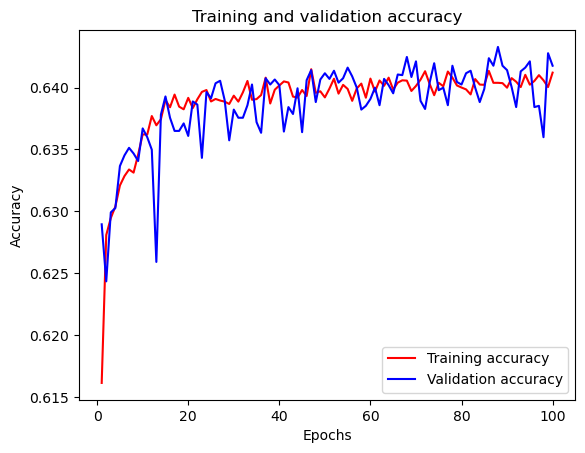

In [103]:
history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [104]:
preds = model.predict(X_test) 
Y_Pred = y_test
Y_Pred = Y_Pred.to_frame()
Y_Pred['Predict'] = preds
Y_Pred
print(y_test.shape,' ',preds.shape)

617/617 [==============================] - 0s 488us/step
(19733,)   (19733, 1)


<AxesSubplot:>

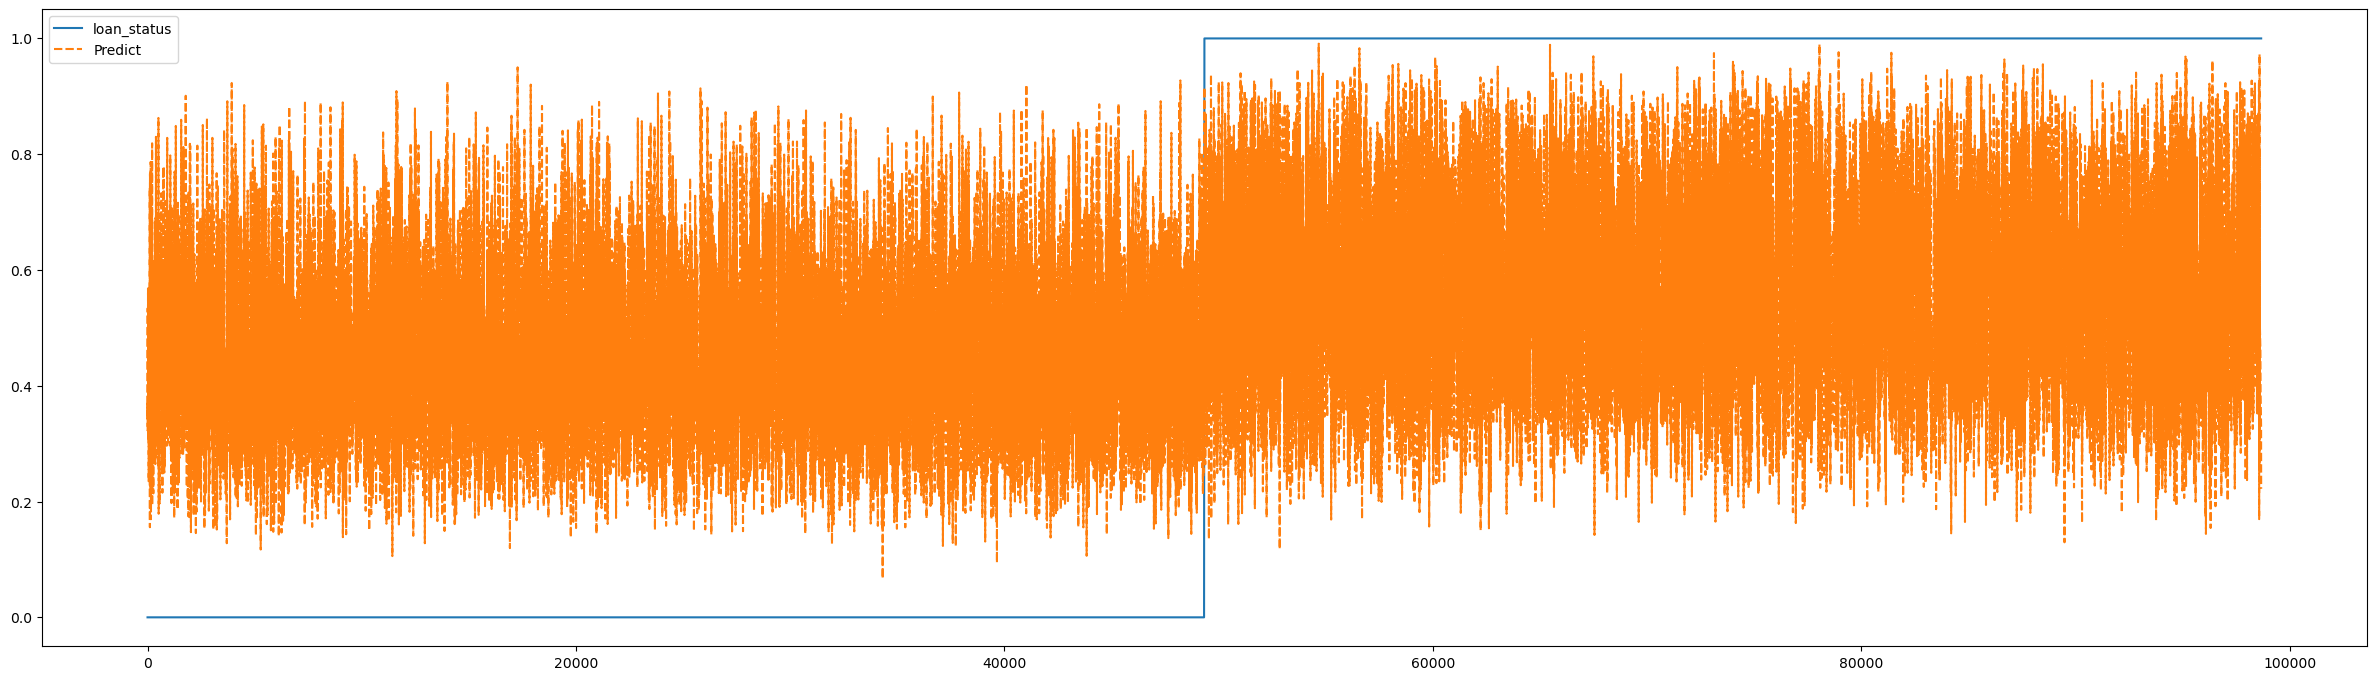

In [105]:
fig, ax = plt.subplots(figsize=(30, 8.27))
sns.lineplot(ax=ax, data=Y_Pred)

In [106]:
Y_Pred

,loan_status,Predict
50577,1,0.569097
26490,0,0.381595
47478,0,0.266954
91046,1,0.416436
25869,0,0.627996
...,...,...
81647,1,0.662829
3282,0,0.621608
15743,0,0.435054
34075,0,0.483399


In [107]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, preds.round())
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, preds.round())
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,preds.round())
print('Accuracy:',result2)

Confusion Matrix:
[[6670 3298]
 [3771 5994]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.67      0.65      9968
           1       0.65      0.61      0.63      9765

    accuracy                           0.64     19733
   macro avg       0.64      0.64      0.64     19733
weighted avg       0.64      0.64      0.64     19733

Accuracy: 0.6417675974256322
